# 1. Customary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Object Creation

## Series
Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([2, 4, 8, np.nan, np.nan, 128]) # creating the series
s

0      2.0
1      4.0
2      8.0
3      NaN
4      NaN
5    128.0
dtype: float64

## Dataframes
### Creating a `DataFrame` by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=7)  # creating the datetime index
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07'],
              dtype='datetime64[ns]', freq='D')

In [4]:
data_array=np.random.randn(7, 4) # creating the NumPy array
data_array

array([[-0.19073522,  0.32088523,  1.12719679, -0.70570096],
       [-1.66034603, -0.99094388,  1.05343668, -0.12697611],
       [-0.67955478, -0.25337155, -0.28070006,  0.4919531 ],
       [ 0.63249312, -1.22940439,  1.31414237,  0.16095548],
       [ 0.02920754,  0.90335668, -1.83229517,  0.15854977],
       [ 0.81843605, -2.80120012,  1.70506505, -0.17652072],
       [ 0.0282787 ,  0.09889343, -1.31531715,  0.80321007]])

In [5]:
df = pd.DataFrame(data_array, index=dates, columns=list('ABCD'))# creating the dataframe
df

,A,B,C,D
2013-01-01,-0.190735,0.320885,1.127197,-0.705701
2013-01-02,-1.660346,-0.990944,1.053437,-0.126976
2013-01-03,-0.679555,-0.253372,-0.280700,0.491953
2013-01-04,0.632493,-1.229404,1.314142,0.160955
2013-01-05,0.029208,0.903357,-1.832295,0.158550
2013-01-06,0.818436,-2.801200,1.705065,-0.176521
2013-01-07,0.028279,0.098893,-1.315317,0.803210


In [6]:
# creating the index, array and datagrame at a go
df2 = pd.DataFrame(np.random.randn(7, 4), index=pd.date_range('20130101', periods=7), columns=list('ABCD')) 
df2

,A,B,C,D
2013-01-01,0.230483,0.201098,-0.542564,-0.821414
2013-01-02,0.600710,1.052025,1.406676,-0.549316
2013-01-03,0.331554,-1.667488,0.120545,0.554682
2013-01-04,0.350757,0.726109,0.695419,1.602466
2013-01-05,-0.516995,2.026967,-0.159918,1.884849
2013-01-06,0.582642,-1.367265,1.871798,-0.215348
2013-01-07,-0.439665,1.696798,-0.276339,-0.272441


### Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [7]:
df3 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

df3

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [8]:
df3.dtypes # checking data types 

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 3. Viewing Data

### Viewing the top of the dataframe

In [9]:
df.head()

,A,B,C,D
2013-01-01,-0.190735,0.320885,1.127197,-0.705701
2013-01-02,-1.660346,-0.990944,1.053437,-0.126976
2013-01-03,-0.679555,-0.253372,-0.280700,0.491953
2013-01-04,0.632493,-1.229404,1.314142,0.160955
2013-01-05,0.029208,0.903357,-1.832295,0.158550


### Viewing the bottom of the dataframe

In [10]:
df.tail()

,A,B,C,D
2013-01-03,-0.679555,-0.253372,-0.280700,0.491953
2013-01-04,0.632493,-1.229404,1.314142,0.160955
2013-01-05,0.029208,0.903357,-1.832295,0.158550
2013-01-06,0.818436,-2.801200,1.705065,-0.176521
2013-01-07,0.028279,0.098893,-1.315317,0.803210


### Viewing the index and columns

In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

### To get a quick statistical summary

In [13]:
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,-0.146032,-0.564541,0.253076,0.086496
std,0.834385,1.231678,1.398353,0.488388
min,-1.660346,-2.801200,-1.832295,-0.705701
25%,-0.435145,-1.110174,-0.798009,-0.151748
50%,0.028279,-0.253372,1.053437,0.158550
75%,0.330850,0.209889,1.220670,0.326454
max,0.818436,0.903357,1.705065,0.803210


### Transposing data

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07
A,-0.190735,-1.660346,-0.679555,0.632493,0.029208,0.818436,0.028279
B,0.320885,-0.990944,-0.253372,-1.229404,0.903357,-2.801200,0.098893
C,1.127197,1.053437,-0.280700,1.314142,-1.832295,1.705065,-1.315317
D,-0.705701,-0.126976,0.491953,0.160955,0.158550,-0.176521,0.803210


### Sorting by axis

In [15]:
df.sort_index()

,A,B,C,D
2013-01-01,-0.190735,0.320885,1.127197,-0.705701
2013-01-02,-1.660346,-0.990944,1.053437,-0.126976
2013-01-03,-0.679555,-0.253372,-0.280700,0.491953
2013-01-04,0.632493,-1.229404,1.314142,0.160955
2013-01-05,0.029208,0.903357,-1.832295,0.158550
2013-01-06,0.818436,-2.801200,1.705065,-0.176521
2013-01-07,0.028279,0.098893,-1.315317,0.803210


In [16]:
df.sort_index(axis=1, ascending=False)  # sorts the columns (by label) in descending order

,D,C,B,A
2013-01-01,-0.705701,1.127197,0.320885,-0.190735
2013-01-02,-0.126976,1.053437,-0.990944,-1.660346
2013-01-03,0.491953,-0.280700,-0.253372,-0.679555
2013-01-04,0.160955,1.314142,-1.229404,0.632493
2013-01-05,0.158550,-1.832295,0.903357,0.029208
2013-01-06,-0.176521,1.705065,-2.801200,0.818436
2013-01-07,0.803210,-1.315317,0.098893,0.028279


In [17]:
df.sort_index(axis=0, ascending=False) # sorts the rows (by index) in descending order

,A,B,C,D
2013-01-07,0.028279,0.098893,-1.315317,0.803210
2013-01-06,0.818436,-2.801200,1.705065,-0.176521
2013-01-05,0.029208,0.903357,-1.832295,0.158550
2013-01-04,0.632493,-1.229404,1.314142,0.160955
2013-01-03,-0.679555,-0.253372,-0.280700,0.491953
2013-01-02,-1.660346,-0.990944,1.053437,-0.126976
2013-01-01,-0.190735,0.320885,1.127197,-0.705701


### Sorting by values

In [18]:
df.sort_values(by='B') # sorting rows in ascending order by values in colums B

,A,B,C,D
2013-01-06,0.818436,-2.801200,1.705065,-0.176521
2013-01-04,0.632493,-1.229404,1.314142,0.160955
2013-01-02,-1.660346,-0.990944,1.053437,-0.126976
2013-01-03,-0.679555,-0.253372,-0.280700,0.491953
2013-01-07,0.028279,0.098893,-1.315317,0.803210
2013-01-01,-0.190735,0.320885,1.127197,-0.705701
2013-01-05,0.029208,0.903357,-1.832295,0.158550


In [19]:
df.sort_values(by='C', ascending=False)  # sorting rows in descending order by values in colums C

,A,B,C,D
2013-01-06,0.818436,-2.801200,1.705065,-0.176521
2013-01-04,0.632493,-1.229404,1.314142,0.160955
2013-01-01,-0.190735,0.320885,1.127197,-0.705701
2013-01-02,-1.660346,-0.990944,1.053437,-0.126976
2013-01-03,-0.679555,-0.253372,-0.280700,0.491953
2013-01-07,0.028279,0.098893,-1.315317,0.803210
2013-01-05,0.029208,0.903357,-1.832295,0.158550


# 4. Selection

### Selecting a single column, which yields a Series

In [20]:
df.A

2013-01-01   -0.190735
2013-01-02   -1.660346
2013-01-03   -0.679555
2013-01-04    0.632493
2013-01-05    0.029208
2013-01-06    0.818436
2013-01-07    0.028279
Freq: D, Name: A, dtype: float64

In [21]:
df['A']

2013-01-01   -0.190735
2013-01-02   -1.660346
2013-01-03   -0.679555
2013-01-04    0.632493
2013-01-05    0.029208
2013-01-06    0.818436
2013-01-07    0.028279
Freq: D, Name: A, dtype: float64

### Selecting slices of rows

In [22]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.660346,-0.990944,1.053437,-0.126976
2013-01-03,-0.679555,-0.253372,-0.280700,0.491953
2013-01-04,0.632493,-1.229404,1.314142,0.160955


## Selection by label

In [23]:
df.loc[dates[0]] # selecting the first row 

A   -0.190735
B    0.320885
C    1.127197
D   -0.705701
Name: 2013-01-01 00:00:00, dtype: float64

In [24]:
df.loc[:, ['A', 'B']] # selecting values for columns 'A' and 'B'

,A,B
2013-01-01,-0.190735,0.320885
2013-01-02,-1.660346,-0.990944
2013-01-03,-0.679555,-0.253372
2013-01-04,0.632493,-1.229404
2013-01-05,0.029208,0.903357
2013-01-06,0.818436,-2.801200
2013-01-07,0.028279,0.098893


In [25]:
df.loc['20130102':'20130104', ['C', 'D']] # multi-axis label selection

,C,D
2013-01-02,1.053437,-0.126976
2013-01-03,-0.280700,0.491953
2013-01-04,1.314142,0.160955


### Reduction in dimension of the returned object

In [26]:
df.loc['20130102', ['A', 'B']]

A   -1.660346
B   -0.990944
Name: 2013-01-02 00:00:00, dtype: float64

### Getting fast access to a scalar value

In [27]:
 df.at[dates[0], 'A'] # label based

-0.19073522268859772

In [28]:
df.iat[0, 0] # position based

-0.19073522268859772

## Selection by position

In [29]:
df.iloc[4]

A    0.029208
B    0.903357
C   -1.832295
D    0.158550
Name: 2013-01-05 00:00:00, dtype: float64

In [30]:
df.iloc[3:5, 2:4]

,C,D
2013-01-04,1.314142,0.160955
2013-01-05,-1.832295,0.158550


In [31]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.660346,1.053437
2013-01-03,-0.679555,-0.280700
2013-01-05,0.029208,-1.832295


## Boolean indexing

In [32]:
df[df['B'] > 0] # selecting rows for which values of in column 'A' are > 0

,A,B,C,D
2013-01-01,-0.190735,0.320885,1.127197,-0.705701
2013-01-05,0.029208,0.903357,-1.832295,0.158550
2013-01-07,0.028279,0.098893,-1.315317,0.803210


In [33]:
df[df > 0] # selecting only values in the dataframe where a Boolean condition is met

,A,B,C,D
2013-01-01,NaN,0.320885,1.127197,NaN
2013-01-02,NaN,NaN,1.053437,NaN
2013-01-03,NaN,NaN,NaN,0.491953
2013-01-04,0.632493,NaN,1.314142,0.160955
2013-01-05,0.029208,0.903357,NaN,0.158550
2013-01-06,0.818436,NaN,1.705065,NaN
2013-01-07,0.028279,0.098893,NaN,0.803210


### Using the `isin()` method for filtering

In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three','seven']
df2

,A,B,C,D,E
2013-01-01,-0.190735,0.320885,1.127197,-0.705701,one
2013-01-02,-1.660346,-0.990944,1.053437,-0.126976,one
2013-01-03,-0.679555,-0.253372,-0.280700,0.491953,two
2013-01-04,0.632493,-1.229404,1.314142,0.160955,three
2013-01-05,0.029208,0.903357,-1.832295,0.158550,four
2013-01-06,0.818436,-2.801200,1.705065,-0.176521,three
2013-01-07,0.028279,0.098893,-1.315317,0.803210,seven


In [35]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.679555,-0.253372,-0.280700,0.491953,two
2013-01-05,0.029208,0.903357,-1.832295,0.158550,four


# 5. Setting

In [36]:
s1 = pd.Series([1, 2, 3, 4, 5, 6,7], index=pd.date_range('20130102', periods=7))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
2013-01-08    7
Freq: D, dtype: int64

In [37]:
df['F'] = s1 # setting s1 as column 'F' in the dataframe
df

,A,B,C,D,F
2013-01-01,-0.190735,0.320885,1.127197,-0.705701,NaN
2013-01-02,-1.660346,-0.990944,1.053437,-0.126976,1.0
2013-01-03,-0.679555,-0.253372,-0.280700,0.491953,2.0
2013-01-04,0.632493,-1.229404,1.314142,0.160955,3.0
2013-01-05,0.029208,0.903357,-1.832295,0.158550,4.0
2013-01-06,0.818436,-2.801200,1.705065,-0.176521,5.0
2013-01-07,0.028279,0.098893,-1.315317,0.803210,6.0


### Setting values by label

In [38]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.320885,1.127197,-0.705701,NaN
2013-01-02,-1.660346,-0.990944,1.053437,-0.126976,1.0
2013-01-03,-0.679555,-0.253372,-0.280700,0.491953,2.0
2013-01-04,0.632493,-1.229404,1.314142,0.160955,3.0
2013-01-05,0.029208,0.903357,-1.832295,0.158550,4.0
2013-01-06,0.818436,-2.801200,1.705065,-0.176521,5.0
2013-01-07,0.028279,0.098893,-1.315317,0.803210,6.0


### Setting values by position

In [39]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.127197,-0.705701,NaN
2013-01-02,-1.660346,-0.990944,1.053437,-0.126976,1.0
2013-01-03,-0.679555,-0.253372,-0.280700,0.491953,2.0
2013-01-04,0.632493,-1.229404,1.314142,0.160955,3.0
2013-01-05,0.029208,0.903357,-1.832295,0.158550,4.0
2013-01-06,0.818436,-2.801200,1.705065,-0.176521,5.0
2013-01-07,0.028279,0.098893,-1.315317,0.803210,6.0


### Setting by assigning with a NumPy array

In [40]:
df.loc[:, 'D'] = np.array([7] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.127197,7,NaN
2013-01-02,-1.660346,-0.990944,1.053437,7,1.0
2013-01-03,-0.679555,-0.253372,-0.280700,7,2.0
2013-01-04,0.632493,-1.229404,1.314142,7,3.0
2013-01-05,0.029208,0.903357,-1.832295,7,4.0
2013-01-06,0.818436,-2.801200,1.705065,7,5.0
2013-01-07,0.028279,0.098893,-1.315317,7,6.0


### A `where` operation with setting

In [41]:
df2 = df.copy()
df2[df2 < 0] = "-ve"
df2

,A,B,C,D,F
2013-01-01,0,0,1.1272,7,NaN
2013-01-02,-ve,-ve,1.05344,7,1.0
2013-01-03,-ve,-ve,-ve,7,2.0
2013-01-04,0.632493,-ve,1.31414,7,3.0
2013-01-05,0.0292075,0.903357,-ve,7,4.0
2013-01-06,0.818436,-ve,1.70507,7,5.0
2013-01-07,0.0282787,0.0988934,-ve,7,6.0


# 6. Missing Data

In [42]:
df.iat[4,2]=np.nan
df.at['20130102','A']=np.nan
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.127197,7,NaN
2013-01-02,NaN,-0.990944,1.053437,7,1.0
2013-01-03,-0.679555,-0.253372,-0.280700,7,2.0
2013-01-04,0.632493,-1.229404,1.314142,7,3.0
2013-01-05,0.029208,0.903357,NaN,7,4.0
2013-01-06,0.818436,-2.801200,1.705065,7,5.0
2013-01-07,0.028279,0.098893,-1.315317,7,6.0


### Dropping rows with missing data

In [43]:
df.dropna()

,A,B,C,D,F
2013-01-03,-0.679555,-0.253372,-0.280700,7,2.0
2013-01-04,0.632493,-1.229404,1.314142,7,3.0
2013-01-06,0.818436,-2.801200,1.705065,7,5.0
2013-01-07,0.028279,0.098893,-1.315317,7,6.0


### Filling missing values

In [44]:
df.fillna(value=0.001234)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.127197,7,0.001234
2013-01-02,0.001234,-0.990944,1.053437,7,1.000000
2013-01-03,-0.679555,-0.253372,-0.280700,7,2.000000
2013-01-04,0.632493,-1.229404,1.314142,7,3.000000
2013-01-05,0.029208,0.903357,0.001234,7,4.000000
2013-01-06,0.818436,-2.801200,1.705065,7,5.000000
2013-01-07,0.028279,0.098893,-1.315317,7,6.000000


### To get the boolean mask where values are nan:

In [45]:
pd.isna(df)

,A,B,C,D,F
2013-01-01,False,False,False,False,True
2013-01-02,True,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False
2013-01-05,False,False,True,False,False
2013-01-06,False,False,False,False,False
2013-01-07,False,False,False,False,False


# 7. Operations

In [46]:
df.mean() # gives the mean for each column

A    0.138143
B   -0.610381
C    0.600637
D    7.000000
F    3.500000
dtype: float64

In [47]:
df.mean(1) # calculates the mean for each row 

2013-01-01    2.031799
2013-01-02    2.015623
2013-01-03    1.557275
2013-01-04    2.143446
2013-01-05    2.983141
2013-01-06    2.344460
2013-01-07    2.362371
Freq: D, dtype: float64

### Applying functions to the dataframe

In [48]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.127197,7,NaN
2013-01-02,NaN,-0.990944,2.180633,14,1.0
2013-01-03,-0.679555,-1.244315,1.899933,21,3.0
2013-01-04,-0.047062,-2.473720,3.214076,28,6.0
2013-01-05,-0.017854,-1.570363,NaN,35,10.0
2013-01-06,0.800582,-4.371563,4.919141,42,15.0
2013-01-07,0.828861,-4.272670,3.603824,49,21.0


In [49]:
df.apply(lambda x: x.max() - x.min()) # quickly getting the range per column

A    1.497991
B    3.704557
C    3.020382
D    0.000000
F    5.000000
dtype: float64

### Histogramming

In [50]:
df2

,A,B,C,D,F
2013-01-01,0,0,1.1272,7,NaN
2013-01-02,-ve,-ve,1.05344,7,1.0
2013-01-03,-ve,-ve,-ve,7,2.0
2013-01-04,0.632493,-ve,1.31414,7,3.0
2013-01-05,0.0292075,0.903357,-ve,7,4.0
2013-01-06,0.818436,-ve,1.70507,7,5.0
2013-01-07,0.0282787,0.0988934,-ve,7,6.0


In [51]:
df2.C.value_counts()

-ve                   3
1.7050650537101244    1
1.3141423743752405    1
1.05343667528164      1
1.1271967917287584    1
Name: C, dtype: int64

### String methods

In [52]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [53]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 8. Merge

## Concat

In [54]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['1st','2nd','3rd','4th'])
df

,1st,2nd,3rd,4th
0,0.293905,-0.056214,-1.897117,0.222807
1,-1.979622,0.903562,1.572201,0.189697
2,-0.527648,-0.295892,0.200878,0.084157
3,0.989493,0.851475,0.447398,-1.434331
4,1.183844,1.434819,-0.281011,0.076428
5,0.281574,0.521502,0.378342,-1.233094
6,0.533070,1.423357,0.294082,-1.613283
7,0.850275,0.138370,1.960073,-0.727610
8,-0.962433,-2.224324,-1.546045,0.622930
9,0.740861,0.951157,-0.075511,-1.395169


In [55]:
df1, df2, df3 = [df[:3], df[3:7], df[7:]]

In [56]:
print(df1,df2,df3, sep='\n\n')

        1st       2nd       3rd       4th
0  0.293905 -0.056214 -1.897117  0.222807
1 -1.979622  0.903562  1.572201  0.189697
2 -0.527648 -0.295892  0.200878  0.084157

        1st       2nd       3rd       4th
3  0.989493  0.851475  0.447398 -1.434331
4  1.183844  1.434819 -0.281011  0.076428
5  0.281574  0.521502  0.378342 -1.233094
6  0.533070  1.423357  0.294082 -1.613283

        1st       2nd       3rd       4th
7  0.850275  0.138370  1.960073 -0.727610
8 -0.962433 -2.224324 -1.546045  0.622930
9  0.740861  0.951157 -0.075511 -1.395169


In [57]:
df4=pd.concat([df3,df2,df1])
df4

,1st,2nd,3rd,4th
7,0.850275,0.138370,1.960073,-0.727610
8,-0.962433,-2.224324,-1.546045,0.622930
9,0.740861,0.951157,-0.075511,-1.395169
3,0.989493,0.851475,0.447398,-1.434331
4,1.183844,1.434819,-0.281011,0.076428
5,0.281574,0.521502,0.378342,-1.233094
6,0.533070,1.423357,0.294082,-1.613283
0,0.293905,-0.056214,-1.897117,0.222807
1,-1.979622,0.903562,1.572201,0.189697
2,-0.527648,-0.295892,0.200878,0.084157


## Join
SQL - style merges

In [58]:
left = pd.DataFrame({'key': ['foo', 'foo', 'bar'], 'lval': [1, 2, 3]})
left

,key,lval
0,foo,1
1,foo,2
2,bar,3


In [59]:
right = pd.DataFrame({'key': ['foo', 'bar', 'foo'], 'rval': [4, 5, 6]})
right

,key,rval
0,foo,4
1,bar,5
2,foo,6


In [60]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,6
2,foo,2,4
3,foo,2,6
4,bar,3,5


# 9. Grouping

In this context, "group by” refers to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria

- **Applying** a function to each group independently

- **Combining** the results into a data structure

In [61]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.800772,-1.158237
1,bar,one,-1.782453,1.190814
2,foo,two,-1.575362,-0.960566
3,bar,three,2.323098,-0.028240
4,foo,two,-1.460433,1.374454
5,bar,two,0.569973,-0.958139
6,foo,one,-0.156144,0.377233
7,foo,three,-0.100358,1.479522


In [62]:
 df.groupby('B').sum()

,C,D
B,,
one,-1.137826,0.409811
three,2.222740,1.451282
two,-2.465822,-0.544252


In [63]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.782453  1.190814
    three  2.323098 -0.028240
    two    0.569973 -0.958139
foo one    0.644627 -0.781004
    three -0.100358  1.479522
    two   -3.035795  0.413887

# 10. Reshaping

## Stack

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [64]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
    
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.239658 -1.167134
      two    -2.261814 -1.918308
baz   one    -0.042598 -0.767625
      two    -0.951975  0.159480
foo   one    -1.265131 -0.720846
      two    -0.483281 -0.524010
qux   one     0.614667 -1.079419
      two    -0.456336 -0.469881

In [65]:
stacked = df.stack()
stacked

first  second   
bar    one     A   -0.239658
               B   -1.167134
       two     A   -2.261814
               B   -1.918308
baz    one     A   -0.042598
               B   -0.767625
       two     A   -0.951975
               B    0.159480
foo    one     A   -1.265131
               B   -0.720846
       two     A   -0.483281
               B   -0.524010
qux    one     A    0.614667
               B   -1.079419
       two     A   -0.456336
               B   -0.469881
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of `stack()` is **`unstack()`**, which by default unstacks the last level:

In [66]:
stacked.unstack()

A         B
first second                    
bar   one    -0.239658 -1.167134
      two    -2.261814 -1.918308
baz   one    -0.042598 -0.767625
      two    -0.951975  0.159480
foo   one    -1.265131 -0.720846
      two    -0.483281 -0.524010
qux   one     0.614667 -1.079419
      two    -0.456336 -0.469881

In [67]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A -0.239658 -0.042598 -1.265131  0.614667
       B -1.167134 -0.767625 -0.720846 -1.079419
two    A -2.261814 -0.951975 -0.483281 -0.456336
       B -1.918308  0.159480 -0.524010 -0.469881

In [68]:
stacked.unstack().unstack(0)

A                                       B                      \
first        bar       baz       foo       qux       bar       baz       foo   
second                                                                         
one    -0.239658 -0.042598 -1.265131  0.614667 -1.167134 -0.767625 -0.720846   
two    -2.261814 -0.951975 -0.483281 -0.456336 -1.918308  0.159480 -0.524010   

                  
first        qux  
second            
one    -1.079419  
two    -0.469881

## Pivot tables

In [69]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-1.459734,2.137315
1,one,B,foo,-0.918036,0.881730
2,two,C,foo,0.165337,-2.528654
3,three,A,bar,-1.235688,0.426755
4,one,B,bar,-0.600552,0.860635
5,one,C,bar,-0.983054,2.104660
6,two,A,foo,0.654068,-0.692095
7,three,B,foo,0.375536,-0.569084
8,one,C,foo,-0.385872,-0.654886
9,one,A,bar,0.307753,0.634782


In [70]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.307753 -1.459734
      B -0.600552 -0.918036
      C -0.983054 -0.385872
three A -1.235688       NaN
      B       NaN  0.375536
      C  0.328795       NaN
two   A       NaN  0.654068
      B -0.762192       NaN
      C       NaN  0.165337

# 11. Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data)

In [71]:
rng = pd.date_range('1/1/2020', periods=100, freq='S')
rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19',
               '2020-01-01 00:00:20', '2020-01-01 00:00:21',
               '2020-01-01 00:00:22', '2020-01-01 00:00:23',
               '2020-01-01 00:00:24', '2020-01-01 00:00:25',
               '2020-01-01 00:00:26', '2020-01-01 00:00:27',
               '2020-01-01 00:00:28', '2020-01-01 00:00:29',
               '2020-01-01 00:00:30', '2020-01-01 00:00:31',
               '2020-01-

In [72]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2020-01-01 00:00:00    102
2020-01-01 00:00:01     69
2020-01-01 00:00:02    197
2020-01-01 00:00:03    324
2020-01-01 00:00:04     60
                      ... 
2020-01-01 00:01:35     38
2020-01-01 00:01:36    108
2020-01-01 00:01:37    276
2020-01-01 00:01:38     34
2020-01-01 00:01:39    123
Freq: S, Length: 100, dtype: int64

In [73]:
ts.resample('5Min').sum()

2020-01-01    24568
Freq: 5T, dtype: int64

### Time zone representation

In [74]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.199986
2012-03-07    1.456895
2012-03-08   -0.093609
2012-03-09    0.792288
2012-03-10    0.173970
Freq: D, dtype: float64

In [75]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.199986
2012-03-07 00:00:00+00:00    1.456895
2012-03-08 00:00:00+00:00   -0.093609
2012-03-09 00:00:00+00:00    0.792288
2012-03-10 00:00:00+00:00    0.173970
Freq: D, dtype: float64

### Converting to another time zone:

In [76]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.199986
2012-03-06 19:00:00-05:00    1.456895
2012-03-07 19:00:00-05:00   -0.093609
2012-03-08 19:00:00-05:00    0.792288
2012-03-09 19:00:00-05:00    0.173970
Freq: D, dtype: float64

### Converting between time span representations:

In [77]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.652031
2012-02-29    1.312310
2012-03-31   -0.259456
2012-04-30   -0.336618
2012-05-31   -1.314142
Freq: M, dtype: float64

In [78]:
ps = ts.to_period()
ps

2012-01    1.652031
2012-02    1.312310
2012-03   -0.259456
2012-04   -0.336618
2012-05   -1.314142
Freq: M, dtype: float64

In [79]:
ps.to_timestamp()

2012-01-01    1.652031
2012-02-01    1.312310
2012-03-01   -0.259456
2012-04-01   -0.336618
2012-05-01   -1.314142
Freq: MS, dtype: float64

# 12. Categoricals

In [80]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [81]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [82]:
# Rename the categories to more meaningful names
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


# 13. Plotting

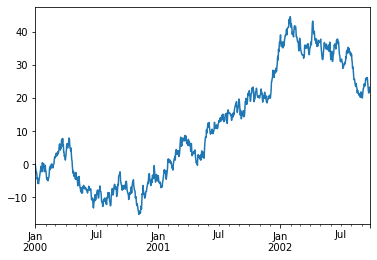

In [83]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

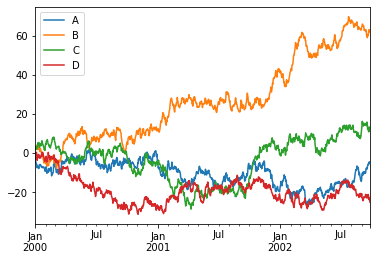

In [84]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()

plt.figure()
df.plot()
plt.legend(loc='best')

# 13. Importing / Exporting Data

## CSV

In [85]:
# Writing to a csv file
df.to_csv('data.csv')

In [86]:
# Reading from a csv file
pd.read_csv('data.csv', index_col=0)

,A,B,C,D
2000-01-01,-1.662334,1.754375,2.277854,-1.222050
2000-01-02,-3.170328,2.640600,3.252950,0.325672
2000-01-03,-4.905516,3.187861,1.720954,-1.209723
2000-01-04,-5.109194,3.717737,2.365512,0.338022
2000-01-05,-5.705884,2.990343,1.962035,0.355969
...,...,...,...,...
2002-09-22,-5.800867,61.973025,10.838181,-23.771765
2002-09-23,-4.772581,62.962272,11.324556,-22.923755
2002-09-24,-4.465015,61.938194,12.820167,-22.725593
2002-09-25,-5.211908,62.952388,11.377140,-23.675546


## Excel

In [87]:
# Writing to an excel file
df.to_excel('data.xlsx', sheet_name='Sheet1')

In [88]:
# Reading from an excel file
pd.read_excel('data.xlsx', index_col=0)

,A,B,C,D
2000-01-01,-1.662334,1.754375,2.277854,-1.222050
2000-01-02,-3.170328,2.640600,3.252950,0.325672
2000-01-03,-4.905516,3.187861,1.720954,-1.209723
2000-01-04,-5.109194,3.717737,2.365512,0.338022
2000-01-05,-5.705884,2.990343,1.962035,0.355969
...,...,...,...,...
2002-09-22,-5.800867,61.973025,10.838181,-23.771765
2002-09-23,-4.772581,62.962272,11.324556,-22.923755
2002-09-24,-4.465015,61.938194,12.820167,-22.725593
2002-09-25,-5.211908,62.952388,11.377140,-23.675546


## HDF5

In [89]:
# Writing to a HDF5 Store
df.to_hdf('data.hdf', 'df')

In [90]:
# Reading from a HDF5 Store 
pd.read_hdf('data.hdf', 'df')

,A,B,C,D
2000-01-01,-1.662334,1.754375,2.277854,-1.222050
2000-01-02,-3.170328,2.640600,3.252950,0.325672
2000-01-03,-4.905516,3.187861,1.720954,-1.209723
2000-01-04,-5.109194,3.717737,2.365512,0.338022
2000-01-05,-5.705884,2.990343,1.962035,0.355969
...,...,...,...,...
2002-09-22,-5.800867,61.973025,10.838181,-23.771765
2002-09-23,-4.772581,62.962272,11.324556,-22.923755
2002-09-24,-4.465015,61.938194,12.820167,-22.725593
2002-09-25,-5.211908,62.952388,11.377140,-23.675546
